In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [144]:
mnist_data = fetch_openml('mnist_784', version=1)

In [145]:
X_data = mnist_data['data'].values  
y_data = mnist_data['target'].values
y_data = y_data.astype(int)
X_data = X_data / 255.0
sample_size = 10000
random_indices = np.random.choice(X_data.shape[0], sample_size, replace=False)
X_data = X_data[random_indices]
y_data = y_data[random_indices]


In [146]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 784) (2000, 784) (8000,) (2000,)


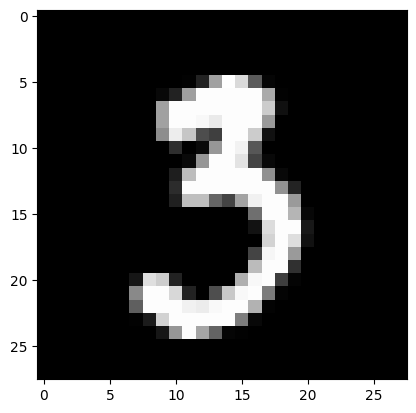

Label: 3


In [147]:
fig = plt.figure
plt.imshow(X_data[44].reshape(28,28), cmap='gray')
plt.show()
#and the according label is
print("Label:", y_data[44])

In [148]:
n_values = range(1, 10)  # Możesz dostosować zakres
accuracies = []

for n in n_values:
    # Tworzenie modelu KNN
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)  # Trenowanie modelu
    y_pred = knn.predict(X_test)  
    
    # Obliczanie dokładności
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'n={n}, Accuracy={accuracy:.4f}')

n=1, Accuracy=0.9390
n=2, Accuracy=0.9230
n=3, Accuracy=0.9390
n=4, Accuracy=0.9370
n=5, Accuracy=0.9365
n=6, Accuracy=0.9315
n=7, Accuracy=0.9330
n=8, Accuracy=0.9315
n=9, Accuracy=0.9285


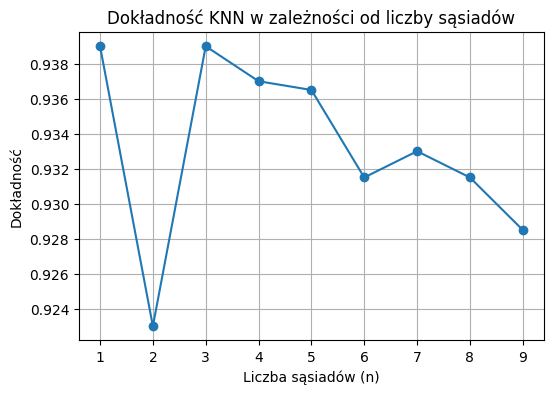

In [149]:
plt.figure(figsize=(6, 4))
plt.plot(n_values, accuracies, marker='o')
plt.title('Dokładność KNN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (n)')
plt.ylabel('Dokładność')
plt.xticks(n_values)
plt.grid()
plt.show()

In [ ]:
k_values = [i for i in range(1,10)]  # Możesz dostosować do swoich potrzeb
# Liczba iteracji bootstrap
bootstrap_iterations = [1, 2, 11, 22, 44, 88]  # Możesz dostosować do swoich potrzeb

results = {k: [] for k in k_values}

# Iteracja po k
for k in k_values:
    for iters in bootstrap_iterations:
        accuracies = []
        for _ in range(iters):
            
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=None)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies)
        results[k].append(mean_accuracy)

for k, mean_accuracies in results.items():
    print(f'Wyniki dla k={k}: {mean_accuracies}')

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(1, 10):
    plt.plot(bootstrap_iterations, results[i], marker='o', label=f'k={i}')
plt.legend(loc='lower right', ncol=3, title='Liczba sąsiadów (k)')
plt.title('Dokładność KNN w zależności od liczby iteracji bootstrap')



In [ ]:
plt.figure(figsize=(10, 6))
results2 = {k: np.mean(results[k]) for k in results.keys()}
print(results2)
plt.plot(results2.keys(),results2.values(), marker='o')
plt.title('Średnia Dokładność KNN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia dokładność')
plt.grid()